In [51]:
from keras.applications import vgg16
import keras

In [52]:
model = vgg16.VGG16(weights='imagenet',include_top = False)
model.save('vggtop.h5')

In [53]:
for l in model.layers:
    l.trainable = False

In [54]:
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D

In [55]:
top_model = model.output
top_model = GlobalAveragePooling2D()(top_model)
top_model = Dense(1024,activation='relu')(top_model)
top_model = Dense(1024,activation='relu')(top_model)
top_model = Dense(2,activation='softmax')(top_model)

In [56]:
nmodel = Model(inputs = model.input, outputs = top_model)
print(nmodel.summary())

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

In [57]:
img_rows, img_cols = 224,224
from keras.preprocessing.image import ImageDataGenerator

train_data_dir = 'faceData/train/'
validation_data_dir = 'faceData/test/'

# Let's use some data augmentaiton 
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=45,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
# set our batch size (typically on most mid tier systems we'll use 16-32)
batch_size = 32
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        class_mode='categorical')

Found 200 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [58]:
from keras.optimizers import RMSprop

nmodel.compile(loss = 'categorical_crossentropy'
              ,optimizer = RMSprop(lr = 0.001), metrics = ['accuracy'])


#Enter the number of training and validation samples here

# We only train 5 EPOCHS 
epochs = 5

history = nmodel.fit_generator(
    train_generator,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size)

Epoch 1/5
7/7 [==============================] - 91s 13s/step - loss: 1.6093 - accuracy: 0.6100 - val_loss: 0.6008 - val_accuracy: 0.6333
Epoch 2/5
7/7 [==============================] - 58s 8s/step - loss: 0.5510 - accuracy: 0.7300 - val_loss: 1.5814 - val_accuracy: 0.5000
Epoch 3/5
7/7 [==============================] - 60s 9s/step - loss: 0.5905 - accuracy: 0.7150 - val_loss: 0.5422 - val_accuracy: 0.6333
Epoch 4/5
7/7 [==============================] - 56s 8s/step - loss: 0.3810 - accuracy: 0.8150 - val_loss: 0.3121 - val_accuracy: 0.9000
Epoch 5/5
7/7 [==============================] - 57s 8s/step - loss: 0.4129 - accuracy: 0.8000 - val_loss: 0.2735 - val_accuracy: 0.9333


In [59]:
nmodel.save('faceRecog.h5')

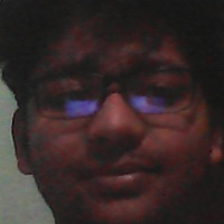

[0]


In [63]:
from keras.models import load_model
from PIL import Image
import numpy as np
classifier = load_model('faceRecog.h5')
input_im = Image.open("faceData/1_10.jpg")
input_im.show()
input_original = input_im.copy()

input_im = input_im.resize((224, 224))
display(input_im)
input_im = np.array(input_im)
input_im = input_im / 255.
input_im = input_im.reshape(1,224,224,3)
res = np.argmax(classifier.predict(input_im, 1, verbose = 0), axis=1)
print(res)    

In [ ]:
"""import os
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join

monkey_breeds_dict = {"[0]": "mantled_howler ", 
                      "[1]": "patas_monkey",
                      "[2]": "bald_uakari",
                      "[3]": "japanese_macaque",
                      "[4]": "pygmy_marmoset ",
                      "[5]": "white_headed_capuchin",
                      "[6]": "silvery_marmoset",
                      "[7]": "common_squirrel_monkey",
                      "[8]": "black_headed_night_monkey",
                      "[9]": "nilgiri_langur"}

monkey_breeds_dict_n = {"n0": "mantled_howler ", 
                      "n1": "patas_monkey",
                      "n2": "bald_uakari",
                      "n3": "japanese_macaque",
                      "n4": "pygmy_marmoset ",
                      "n5": "white_headed_capuchin",
                      "n6": "silvery_marmoset",
                      "n7": "common_squirrel_monkey",
                      "n8": "black_headed_night_monkey",
                      "n9": "nilgiri_langur"}

def draw_test(name, pred, im):
    monkey = monkey_breeds_dict[str(pred)]
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 80, 0, 0, 100 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, monkey, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2.imshow(name, expanded_image)

def getRandomImage(path):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    print("Class - " + monkey_breeds_dict_n[str(path_class)])
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    return cv2.imread(file_path+"/"+image_name)    

for i in range(0,10):
    input_im = getRandomImage("faceData/test/")
    input_original = input_im.copy()
    input_original = cv2.resize(input_original, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_LINEAR)
    
    input_im = cv2.resize(input_im, (224, 224), interpolation = cv2.INTER_LINEAR)
    input_im = input_im / 255.
    input_im = input_im.reshape(1,224,224,3) 
    
    # Get Prediction
    res = np.argmax(classifier.predict(input_im, 1, verbose = 0), axis=1)
    
    # Show image with predicted class
    draw_test("Prediction", res, input_original) 
    cv2.waitKey(0)

cv2.destroyAllWindows()
"""